In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read dataset with client, train, and county name
merged_client_train_count = pd.read_csv('D:/group4/predict-energy-behavior-of-prosumers/data/merged_client_train_count.csv')
merged_client_train_count

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,eic_count,installed_capacity,date,county_name
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0,NaN,NaN,NaN,HARJUMAA
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0,NaN,NaN,NaN,HARJUMAA
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1,NaN,NaN,NaN,HARJUMAA
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1,NaN,NaN,NaN,HARJUMAA
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2,NaN,NaN,NaN,HARJUMAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018347,15,1,0,197.233,1,2023-05-31 23:00:00,637,2018347,64,15.0,620.0,2023-05-29,VÕRUMAA
2018348,15,1,1,0.000,0,2023-05-31 23:00:00,637,2018348,59,20.0,624.5,2023-05-29,VÕRUMAA
2018349,15,1,1,28.404,1,2023-05-31 23:00:00,637,2018349,59,20.0,624.5,2023-05-29,VÕRUMAA
2018350,15,1,3,0.000,0,2023-05-31 23:00:00,637,2018350,60,55.0,2188.2,2023-05-29,VÕRUMAA


In [3]:
# Seperate production and consumption from column "is_consumption"
temp_table = merged_client_train_count.drop(columns=['target','is_consumption','row_id']).drop_duplicates()
temp_table['production'] = merged_client_train_count.query("is_consumption==0")['target'].values
temp_table['consumption'] = merged_client_train_count.query("is_consumption==1")['target'].values
target_data = temp_table

# Convert datetime to specific data type
target_data['datetime'] = target_data['datetime'].values.astype('datetime64[h]')

target_data

,county,is_business,product_type,datetime,data_block_id,prediction_unit_id,eic_count,installed_capacity,date,county_name,production,consumption
0,0,0,1,2021-09-01 00:00:00,0,0,NaN,NaN,NaN,HARJUMAA,0.713,96.590
2,0,0,2,2021-09-01 00:00:00,0,1,NaN,NaN,NaN,HARJUMAA,0.000,17.314
4,0,0,3,2021-09-01 00:00:00,0,2,NaN,NaN,NaN,HARJUMAA,2.904,656.859
6,0,1,0,2021-09-01 00:00:00,0,3,NaN,NaN,NaN,HARJUMAA,0.000,59.000
8,0,1,1,2021-09-01 00:00:00,0,4,NaN,NaN,NaN,HARJUMAA,0.000,501.760
...,...,...,...,...,...,...,...,...,...,...,...,...
2018342,15,0,1,2023-05-31 23:00:00,637,57,51.0,415.60,2023-05-29,VÕRUMAA,0.004,42.401
2018344,15,0,3,2023-05-31 23:00:00,637,58,161.0,2035.75,2023-05-29,VÕRUMAA,2.287,117.332
2018346,15,1,0,2023-05-31 23:00:00,637,64,15.0,620.00,2023-05-29,VÕRUMAA,0.000,197.233
2018348,15,1,1,2023-05-31 23:00:00,637,59,20.0,624.50,2023-05-29,VÕRUMAA,0.000,28.404


Exploratory Data Analysis

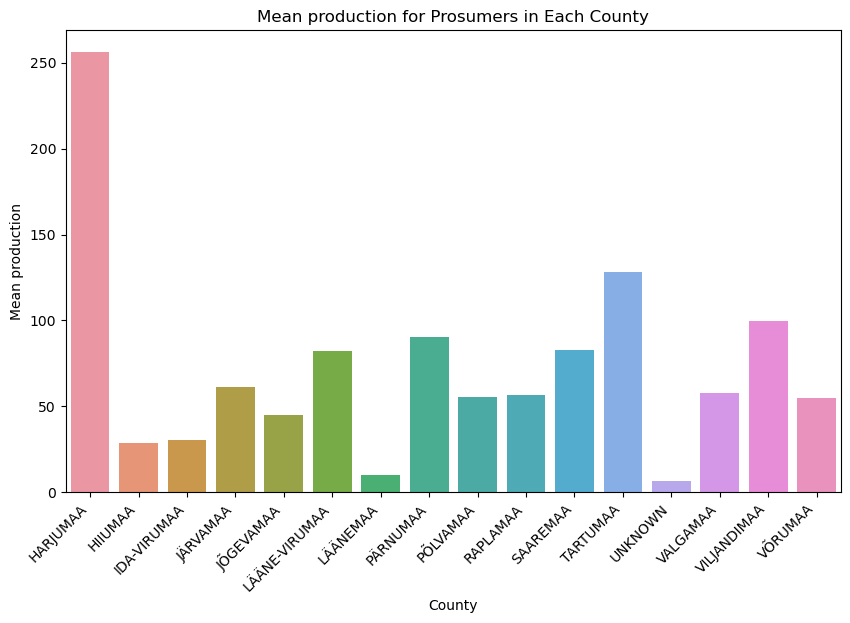

In [5]:
# Calculate mean production per county
mean_production_per_county = target_data.groupby('county_name')['production'].mean().reset_index()
# Plotting
plt.figure(figsize=(10, 6)) 
sns.barplot(x='county_name', y='production', data=mean_production_per_county)
plt.xlabel('County')
plt.ylabel('Mean production')
plt.title('Mean production for Prosumers in Each County')
plt.xticks(rotation=45, ha='right') 
plt.show()

In [1]:
# # Separating Data - Yearly
# county_year_2021 = mean_production_per_county.loc[(mean_production_per_county['datetime'] >= '2021-09-01 00:00:00') & 
#     (merged_df3['datetime'] <= '2021-12-01 00:00:00')]
# county_year_2021

# # Separating Production and Consumption
# temp_table = county_year_2021.drop(columns=['target','is_consumption','row_id']).drop_duplicates()
# temp_table['production'] = county_year_2021.query("is_consumption==0")['target'].values
# temp_table['consumption'] = county_year_2021.query("is_consumption==1")['target'].values
# target_data = temp_table

# # Convert Datetime to specific data type
# target_data['datetime'] = target_data['datetime'].values.astype('datetime64[h]')
# target_data

In [7]:
# Read electricity price dataset
elec_price = pd.read_csv('D:/group4/predict-energy-behavior-of-prosumers/data/electricity_prices.csv')
elec_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15286 entries, 0 to 15285
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   forecast_date  15286 non-null  object 
 1   euros_per_mwh  15286 non-null  float64
 2   origin_date    15286 non-null  object 
 3   data_block_id  15286 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 477.8+ KB


In [8]:
# Merge electricity price data based on datetime
elec_price = elec_price.rename(columns={'origin_date': 'datetime'})
elec_price['datetime'] = elec_price['datetime'].values.astype('datetime64[h]')

merged_client_train_elec = pd.merge(target_data, elec_price, on=['datetime'], how='left')
merged_client_train_elec

,county,is_business,product_type,datetime,data_block_id_x,prediction_unit_id,eic_count,installed_capacity,date,county_name,production,consumption,forecast_date,euros_per_mwh,data_block_id_y
0,0,0,1,2021-09-01 00:00:00,0,0,NaN,NaN,NaN,HARJUMAA,0.713,96.590,2021-09-02 00:00:00,96.99,2.0
1,0,0,2,2021-09-01 00:00:00,0,1,NaN,NaN,NaN,HARJUMAA,0.000,17.314,2021-09-02 00:00:00,96.99,2.0
2,0,0,3,2021-09-01 00:00:00,0,2,NaN,NaN,NaN,HARJUMAA,2.904,656.859,2021-09-02 00:00:00,96.99,2.0
3,0,1,0,2021-09-01 00:00:00,0,3,NaN,NaN,NaN,HARJUMAA,0.000,59.000,2021-09-02 00:00:00,96.99,2.0
4,0,1,1,2021-09-01 00:00:00,0,4,NaN,NaN,NaN,HARJUMAA,0.000,501.760,2021-09-02 00:00:00,96.99,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009171,15,0,1,2023-05-31 23:00:00,637,57,51.0,415.60,2023-05-29,VÕRUMAA,0.004,42.401,NaN,NaN,NaN
1009172,15,0,3,2023-05-31 23:00:00,637,58,161.0,2035.75,2023-05-29,VÕRUMAA,2.287,117.332,NaN,NaN,NaN
1009173,15,1,0,2023-05-31 23:00:00,637,64,15.0,620.00,2023-05-29,VÕRUMAA,0.000,197.233,NaN,NaN,NaN
1009174,15,1,1,2023-05-31 23:00:00,637,59,20.0,624.50,2023-05-29,VÕRUMAA,0.000,28.404,NaN,NaN,NaN


In [9]:
# Read gas price dataset
gas_price = pd.read_csv('D:/group4/predict-energy-behavior-of-prosumers/data/gas_prices.csv')
gas_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   forecast_date          637 non-null    object 
 1   lowest_price_per_mwh   637 non-null    float64
 2   highest_price_per_mwh  637 non-null    float64
 3   origin_date            637 non-null    object 
 4   data_block_id          637 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 25.0+ KB


In [10]:
# Merge gas price dataset based on datetime
gas_price = gas_price.rename(columns={'origin_date': 'datetime'})
gas_price['datetime'] = gas_price['datetime'].values.astype('datetime64[h]')

merged_client_train_elec_gas = pd.merge(merged_client_train_elec, gas_price, on=['datetime'], how='left')
merged_client_train_elec_gas

,county,is_business,product_type,datetime,data_block_id_x,prediction_unit_id,eic_count,installed_capacity,date,county_name,production,consumption,forecast_date_x,euros_per_mwh,data_block_id_y,forecast_date_y,lowest_price_per_mwh,highest_price_per_mwh,data_block_id
0,0,0,1,2021-09-01 00:00:00,0,0,NaN,NaN,NaN,HARJUMAA,0.713,96.590,2021-09-02 00:00:00,96.99,2.0,2021-09-02,45.62,46.29,2.0
1,0,0,2,2021-09-01 00:00:00,0,1,NaN,NaN,NaN,HARJUMAA,0.000,17.314,2021-09-02 00:00:00,96.99,2.0,2021-09-02,45.62,46.29,2.0
2,0,0,3,2021-09-01 00:00:00,0,2,NaN,NaN,NaN,HARJUMAA,2.904,656.859,2021-09-02 00:00:00,96.99,2.0,2021-09-02,45.62,46.29,2.0
3,0,1,0,2021-09-01 00:00:00,0,3,NaN,NaN,NaN,HARJUMAA,0.000,59.000,2021-09-02 00:00:00,96.99,2.0,2021-09-02,45.62,46.29,2.0
4,0,1,1,2021-09-01 00:00:00,0,4,NaN,NaN,NaN,HARJUMAA,0.000,501.760,2021-09-02 00:00:00,96.99,2.0,2021-09-02,45.62,46.29,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009171,15,0,1,2023-05-31 23:00:00,637,57,51.0,415.60,2023-05-29,VÕRUMAA,0.004,42.401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1009172,15,0,3,2023-05-31 23:00:00,637,58,161.0,2035.75,2023-05-29,VÕRUMAA,2.287,117.332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1009173,15,1,0,2023-05-31 23:00:00,637,64,15.0,620.00,2023-05-29,VÕRUMAA,0.000,197.233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1009174,15,1,1,2023-05-31 23:00:00,637,59,20.0,624.50,2023-05-29,VÕRUMAA,0.000,28.404,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Plot installed capacity, consumption, production, electricity price, gas price across datetime
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

ax1 = sns.lineplot(x='datetime', y='installed_capacity', data=merged_client_train_elec_gas, label='Installed Capacity', color='tab:blue')
sns.lineplot(x='datetime', y='production', data=merged_client_train_elec_gas, label='Production', color='tab:green', ax=ax1)
sns.lineplot(x='datetime', y='consumption', data=merged_client_train_elec_gas, label='Consumption', color='tab:orange', ax=ax1)

ax2 = ax1.twinx()
sns.lineplot(x='datetime', y='highest_price_per_mwh', data=merged_client_train_elec_gas, label='Gas Price', color='tab:red', ax=ax2)
sns.lineplot(x='datetime', y='euros_per_mwh', data=merged_client_train_elec_gas, label='Electricity Price', color='tab:purple', ax=ax2)

ax1.set_xlabel('Datetime')
ax1.set_ylabel('Kilowatt', color='tab:blue')
ax2.set_ylabel('Euro/mwh', color='tab:red')
plt.title('Linear Trend of Installed Capacity, Production, Consumption, and Energy Price')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

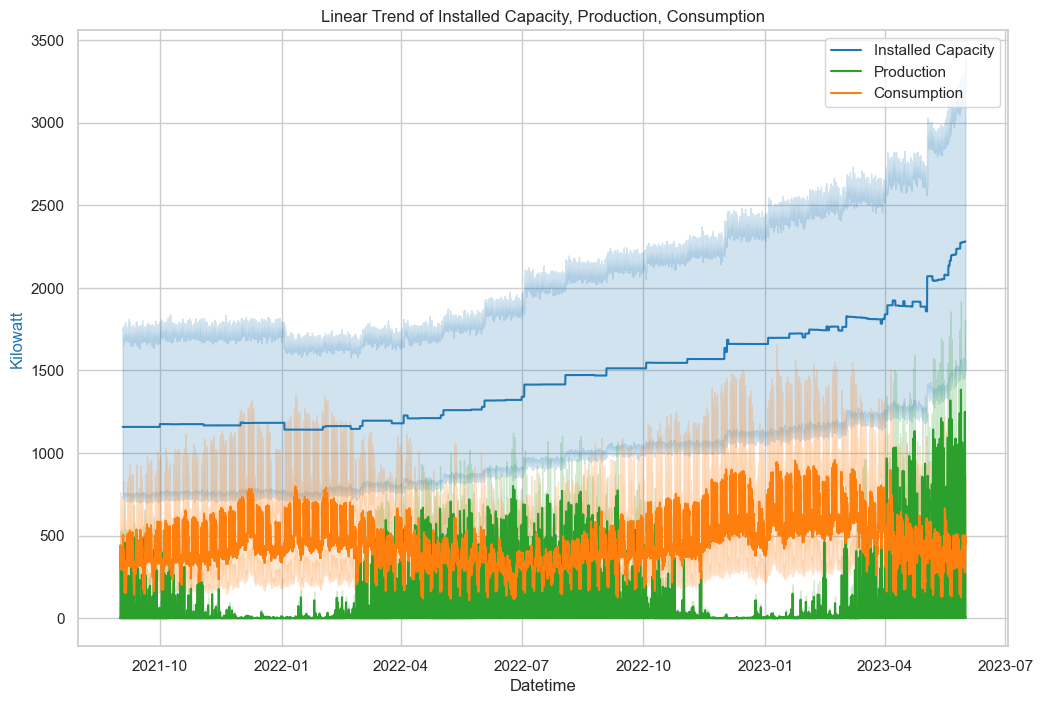

In [14]:
# Plot installed capacity, consumption, production across datetime
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

ax1 = sns.lineplot(x='datetime', y='installed_capacity', data=merged_client_train_elec_gas, label='Installed Capacity', color='tab:blue')
sns.lineplot(x='datetime', y='production', data=merged_client_train_elec_gas, label='Production', color='tab:green', ax=ax1)
sns.lineplot(x='datetime', y='consumption', data=merged_client_train_elec_gas, label='Consumption', color='tab:orange', ax=ax1)

ax1.set_xlabel('Datetime')
ax1.set_ylabel('Kilowatt', color='tab:blue')

plt.title('Linear Trend of Installed Capacity, Production, Consumption')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

In [12]:
# Plot consumption, electricity price, gas price across datetime
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

ax1 = sns.lineplot(x='datetime', y='highest_price_per_mwh', data=merged_client_train_elec_gas, label='Gas Price', color='tab:red', ax=ax1)
sns.lineplot(x='datetime', y='euros_per_mwh', data=merged_client_train_elec_gas, label='Electricity Price', color='tab:purple', ax=ax1)

ax2 = ax1.twinx()
sns.lineplot(x='datetime', y='consumption', data=merged_client_train_elec_gas, label='Consumption', color='tab:orange', ax=ax2)

ax1.set_xlabel('Datetime')
ax2.set_ylabel('Kilowatt', color='tab:blue')
ax1.set_ylabel('Euro/mwh', color='tab:red')
plt.title('Linear Trend of Consumption and Energy Prices')

plt.show()

NameError: name 'ax1' is not defined

<Figure size 1200x800 with 0 Axes>

In [19]:
# Export to a new dataset
merged_client_train_elec_gas.to_csv('D:/group4/predict-energy-behavior-of-prosumers/data/merged_client_train_elec_gas.csv',index=False)

In [19]:
# Get mean data
mean_production_0 = merged_client_train_elec_gas.groupby('county_name')['production'].mean().reset_index()
mean_production
mean_consumption_0 = merged_client_train_elec_gas.groupby('county_name')['consumption'].mean().reset_index()
mean_consumption_0
mean_installed_0 = merged_client_train_elec_gas.groupby('county_name')['installed_capacity'].mean().reset_index()
mean_installed_0
mean_datetime_0 = merged_client_train_elec_gas.groupby('county_name')['datetime'].mean().reset_index()
mean_datetime_0

# Concatenate the DataFrames
combined_df_0 = pd.concat([mean_production_0, mean_consumption_0,mean_installed_0,mean_datetime_0])
combined_df_0

melted_df_0 = pd.melt(combined_df_0, id_vars='county_name', value_vars=['production', 'consumption', 'installed_capacity'],
                    var_name='variable', value_name='value')

# Plot installed capacity, production, consumption for all counties over 2021-2023
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.lineplot(x='county_name', y='value', hue='variable', data=melted_df_0, palette='husl')

plt.title('Production, Consumption, and Installed Capacity 2021 - 2023')
plt.xlabel('County Name')
plt.ylabel('Megawatt')
plt.legend(title='Legend')

plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()